<a href="https://colab.research.google.com/github/JacopoMangiavacchi/FastLabeling/blob/master/mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai -U

Requirement already up-to-date: fastai in /opt/anaconda3/lib/python3.7/site-packages (2.0.0)


In [ ]:
from fastai.vision.all import *

matplotlib.rc('image', cmap='Greys')

In [ ]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
path.ls()

(#2) [Path('training'),Path('testing')]

In [ ]:
(path/'training').ls()

(#10) [Path('training/9'),Path('training/0'),Path('training/7'),Path('training/6'),Path('training/1'),Path('training/8'),Path('training/4'),Path('training/3'),Path('training/2'),Path('training/5')]

In [ ]:
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')

dls.train_ds, dls.valid_ds

((#60000) [(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9))...],
 (#10000) [(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size=28x28, TensorCategory(9)),(PILImage mode=RGB size

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)


epoch,train_loss,valid_loss,accuracy,time
0,0.620910,0.417897,0.868700,07:14


epoch,train_loss,valid_loss,accuracy,time
0,0.079029,0.046458,0.984700,13:35


In [ ]:
learn.validate()

(#2) [0.04645805433392525,0.9847000241279602]

In [ ]:
learn.summary()

Sequential (Input shape: ['64 x 3 x 28 x 28'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 14 x 14    9,408      True      
________________________________________________________________
BatchNorm2d          64 x 64 x 14 x 14    128        True      
________________________________________________________________
ReLU                 64 x 64 x 14 x 14    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 7 x 7      0          False     
________________________________________________________________
Conv2d               64 x 64 x 7 x 7      36,864     True      
________________________________________________________________
BatchNorm2d          64 x 64 x 7 x 7      128        True      
________________________________________________________________
ReLU                 64 x 64 x 7 x 7      0          False     
___________________________________________________

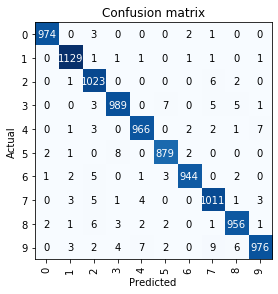

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

In [ ]:
test_path = (path/'testing'/'5').ls()[10]
test_image = Image.open(test_path)
test_image

In [ ]:
learn.predict(test_path)

('5',
 tensor(5),
 tensor([3.9144e-09, 3.6228e-10, 1.1834e-07, 3.6264e-08, 1.1432e-09, 1.0000e+00,
         2.6310e-08, 2.9044e-09, 4.0145e-08, 5.5466e-09]))